In [1]:
import numpy as np
from matplotlib import pyplot as plt 

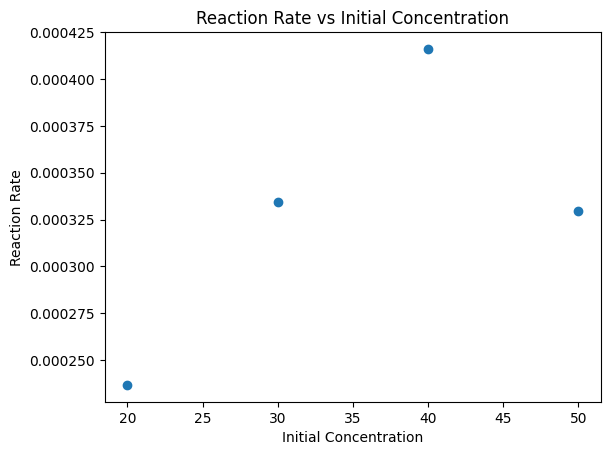

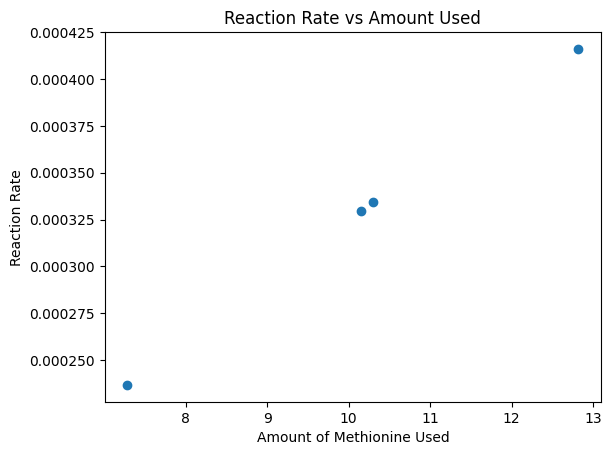

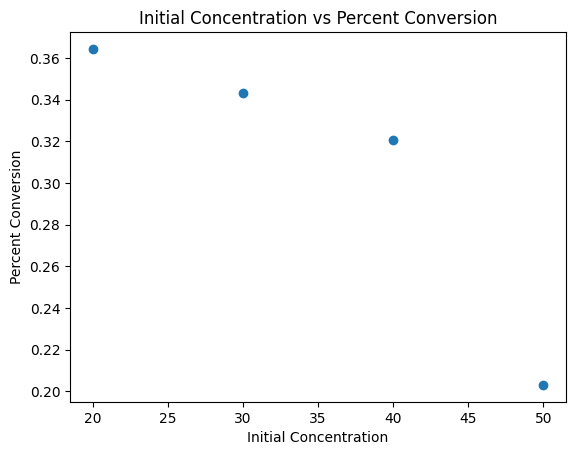

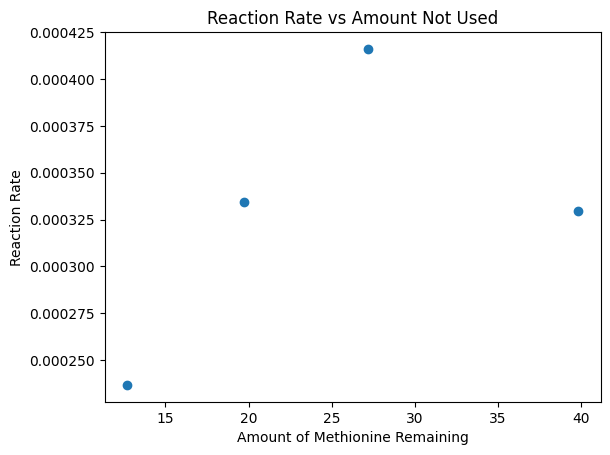

In [8]:
# plotting the data we have for reaction rate (computed from W. Ren et Al 2017 Table 1)
reaction_rates = np.array([2.367e-4, 3.346e-4, 4.1615e-4, 3.2977e-4])
initial_substrate_concentration = np.array([20, 30, 40, 50])
substrate_percent_conversion = np.array([.3643, .3433, .3205, .203])

# first plot reaction rate against initial substrate concentration
plt.scatter(initial_substrate_concentration, reaction_rates, label='reaction rate vs. initial concentration')
plt.title("Reaction Rate vs Initial Concentration")
plt.xlabel("Initial Concentration")
plt.ylabel("Reaction Rate")
plt.show()

# second plot reaction rate against amount converted
plt.scatter(initial_substrate_concentration*substrate_percent_conversion, reaction_rates)
plt.title("Reaction Rate vs Amount Used")
plt.xlabel("Amount of Methionine Used")
plt.ylabel("Reaction Rate")
plt.show()

# third plot percent conversion against initial concentration
plt.scatter(initial_substrate_concentration, substrate_percent_conversion)
plt.title("Initial Concentration vs Percent Conversion")
plt.xlabel("Initial Concentration")
plt.ylabel("Percent Conversion")
plt.show()

# fourth plot reaction rate against amount not converted
plt.scatter(initial_substrate_concentration*(1 - substrate_percent_conversion), reaction_rates)
plt.title("Reaction Rate vs Amount Not Used")
plt.xlabel("Amount of Methionine Remaining")
plt.ylabel("Reaction Rate")
plt.show()

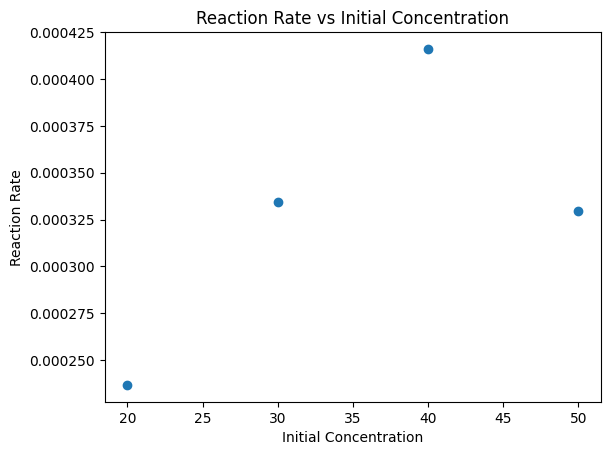

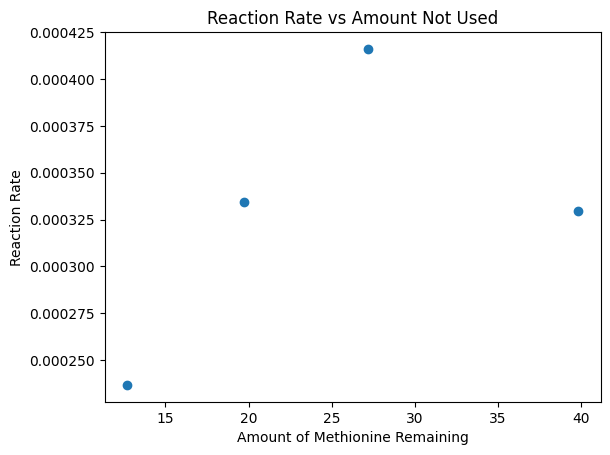

In [9]:
# first plot reaction rate against initial substrate concentration
plt.scatter(initial_substrate_concentration, reaction_rates, label='reaction rate vs. initial concentration')
plt.title("Reaction Rate vs Initial Concentration")
plt.xlabel("Initial Concentration")
plt.ylabel("Reaction Rate")
plt.show()

# fourth plot reaction rate against amount not converted
plt.scatter(initial_substrate_concentration*(1 - substrate_percent_conversion), reaction_rates)
plt.title("Reaction Rate vs Amount Not Used")
plt.xlabel("Amount of Methionine Remaining")
plt.ylabel("Reaction Rate")
plt.show()

Reaction Rate vs Initial Concentration and Reaction Rate vs Amount Not Used seem to be similarly distributed. This is somewhat unexpected, I'll have to think about possible reasons that this is the case.

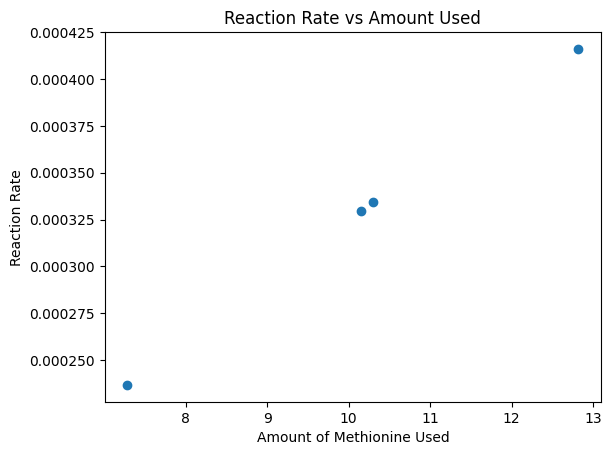

In [10]:
# second plot reaction rate against amount converted
plt.scatter(initial_substrate_concentration*substrate_percent_conversion, reaction_rates)
plt.title("Reaction Rate vs Amount Used")
plt.xlabel("Amount of Methionine Used")
plt.ylabel("Reaction Rate")
plt.show()

This relationship appears relatively linear, which makes sense because the faster the reaction rate the more product can be used. This might be good for finding $k_m$, if $k_m$ is the amount of product used when the reaction rate is half of $v_{max}$ then we can use the proportional relationship in the graph to find it relatively easily.

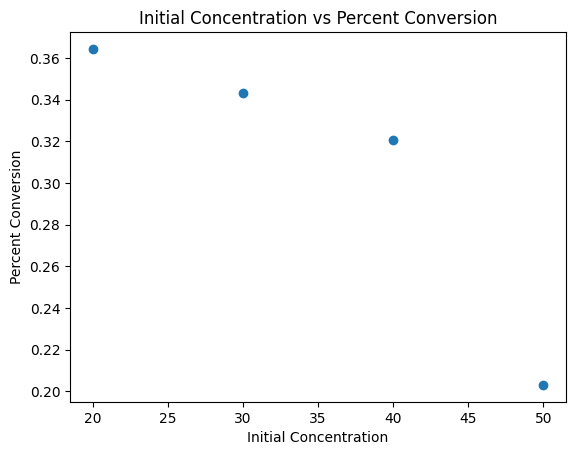

In [11]:
# third plot percent conversion against initial concentration
plt.scatter(initial_substrate_concentration, substrate_percent_conversion)
plt.title("Initial Concentration vs Percent Conversion")
plt.xlabel("Initial Concentration")
plt.ylabel("Percent Conversion")
plt.show()

This one appears to be some sort of negative exponential, which is interesting. It does make sense that the more you start out with the smaller the percentage that is converted will be, but the exponential-looking decrease is somewhat surprising.

In [ ]:
### Alternate Approach using Integrated Michaelis Menten Equation
##### (from Goudar et al (1999) Parameter estimation using a direct solution of the integrated Michaelis-Menten equation)

# rearranging it to be Km as a function of vmax
# Ka*ln([A]_t/[A]_0) = [A]_0 - [A]_t - V_m*t
# Ka = ([A]_0 - [A]_t - V_m*t) / ln([A]_t/[A]_0)
A0, Af = 30, 30*(1 - .3433)
tf = 57.8    # hours

f_Ka = lambda V: (A0 - Af - V*tf) / np.log(Af / A0)